# **DỰ ĐOÁN TỪ TRONG TIẾNG VIỆT QUA MÔ HÌNH WORD2VEC**


Để máy tính có thể xử lý ngôn ngữ như các con số, dữ liệu text đầu vào phải được chuyển đổi sang numeric, tức là đưa nó vào một không gian mới người ta thường gọi là embedding. Một mô hình unsupervised learning - Word Embdedding được ra đời để biểu diễn từ dưới dạng vecto mà ở đó các từ có mối quan hệ về ngữ nghĩa với số chiều vecto nhỏ, không phụ thuộc vocabulary.
Word2vec bao gồm 2 mô hình: 
* Continuous Bag of Words (CBOW): mô hình dự đoán một từ có quan hệ gần nhất với các từ đầu vào.
* Skip-gram: mô hình dự đoán các từ có quan hệ gần nhất với một từ đầu vào. Skip-gram được cho rằng có độ chính xác cao hơn CBOW nhưng tốc độ training không bằng CBOW.

Trước tiên, chúng ta sẽ đi vào mô hình thông dụng nhất - Skip-gram.

## **1. Mô hình Skip-gram**

Mô hình có khả năng dự đoán các từ có quan hệ ngữ nghĩa gần nhất với một từ cho sẵn. 

Ý tưởng là mô hình sẽ đi qua từng từ là ngữ cảnh xung quanh của từ trung tâm trong một văn bản. Để xác định các từ ngữ cảnh, đặt cửa sổ (window) có kích thước m, mô hình sẽ xem xét các từ ở vị trí $i-m$ đến $i + m$ làm ngữ cảnh.

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSO1snmCowetVsM7YR1Z52QUxYvRUN7-sfZAw&usqp=CAU)

> Với window = 1, từ trung tâm là "like", mô hình xác định các từ ngữ cảnh xung quanh của into {(**like**, I), (**like**, natural)}. Tương tự cho các từ khác trong văn bản trên.

Giả sử chuỗi văn bản chúng ta đang xét có T từ, V là số từ trong vocabulary, các vecto trung tâm $\mathbf{x}_i \in \mathbb{R}^{V \times 1}, i = \overline{1..T}$ lần lượt là vecto one-hot của một từ trong văn bản. Chúng có giá trị là 1 tại vị trí index của từ đó trong vocabulary và bằng 0 tại các vị trí khác.

![alt text](https://miro.medium.com/max/753/1*2QrR-94OCmTsuO6sKCMqYw.png)

Các vecto sẽ được đưa vào Input và Hidden Layer sẽ sinh ma trận trọng số $\mathbf{U} \in \mathbb{R}^{V \times N}$, N là số lượng neuron của  Hidden Layer, có hàm kích hoạt (active function) là hàm linear. Vecto tại Hidden Layer tương ứng với output của Hidden layer được biểu diễn như sau:

$$\mathbf{h}_i=\mathbf{U}^T\mathbf{x}_i$$

Các $\mathbf{h}_i \in \mathbb{R}^{N \times 1}$ sẽ đại diện cho hàng của ma trận $\mathbf{U}$, vecto này sau khi qua Output layer sinh ra ma trận trọng số $\mathbf{W} \in \mathbb{R}^{N \times V}$  có hàm kích hoạt là softmax. 
Các score cho mỗi từ trung tâm $\mathbf{x}_i$:

$$\mathbf{s}_i=\mathbf{W}^T\mathbf{h}_i$$

Với $\mathbf{w}_j$ là vecto cột thứ j của ma trận $\mathbf{W}$, ta có score cho mỗi cặp từ trung tâm $\mathbf{x}_i$ và từ ngữ cảnh $\mathbf{x}_j$ là: $$\mathbf{s}_{ij}=\mathbf{w}^T_j\mathbf{h}_i$$


Với các từ ngữ cảnh $\mathbf{x}_j, -m\leq  j\leq  m, j \neq i$ của $\mathbf{x}_i$ qua kích thước m window, xác suất các từ được dự đoán là ngữ cảnh của $\mathbf{x}_i$ cho tất cả các cặp huấn luyện $(\mathbf{x}_i,\mathbf{x}_j)$ qua hàm kích họat softmax:

$P(\mathbf{x}_j|\mathbf{x}_i)=\frac{exp(s_{ij})}{\sum_{k=1}^{V}{exp(s_{ik})}}\\
=\frac{exp(\mathbf{w}^T_j\mathbf{h}_i)}{\sum_{k=1}^{V}{exp(\mathbf{w}^T_k\mathbf{h}_i)}}\\
=\frac{exp(\mathbf{w}^T_j\mathbf{u}_i)}{\sum_{k=1}^{V}{exp(\mathbf{w}^T_k\mathbf{u}_i)}}$

Trong đó, $\mathbf{u}^T_i$ là vecto hàng thứ i của ma trận $\mathbf{U}$, và $\mathbf{w}_j$ là vecto cột thứ j của ma trận $\mathbf{W}$



**Hàm mất mát**

Khi có tất cả các từ ngữ cảnh, chúng ta sẽ cố gắng tối đa hóa khả năng xuất hiện của các từ ngữ cảnh xung quanh từ trung tâm, điều này đồng nghĩa với việc cố gắng tối đa hóa xác suất đó, xác xuất càng cao nghĩa là từ ngữ cảnh có nghĩa càng gần với từ trung tâm.  Trong một chuỗi văn bản có $T$ từ, từ trung tâm được ký hiệu là $\mathbf{x}_i$, các từ ngữ cảnh trong kích thước m của cửa sổ là $\mathbf{x}_j$. Giả sử rằng các từ ngữ cảnh được sinh độc lập với từ trung tâm cho trước, gọi $\theta$ là vecto bao gồm các trọng số ma trận $\mathbf{U}, \mathbf{W}$. Mục tiêu của quá trình huấn luyện là điều chỉnh trọng số để tối đa hóa xác xuất trên. Hàm tối đa $L$ này biểu diễn theo công thức:

$F(\theta)= \prod_{i=1}^{T}\prod_{i-m\leq  j\leq  i+m, j \neq i}P(\mathbf{x}_j|\mathbf{x}_i,\theta)$

Để thuận lợi cho việc tính toán và đạo hàm, bài toán sẽ chuyển về tối thiểu hóa $L$

$L(\theta)= -logF(\theta)\\= -\sum_{i=1}^{T}\sum_{i-m\leq  j\leq  i+m, j \neq i}logP(\mathbf{x}_j|\mathbf{x}_i,\theta)\\=-\sum_{i=1}^{T}\sum_{i-m\leq  j\leq  i+m, j \neq i}(\mathbf{w}^T_j\mathbf{u}_i-log(\sum_{k=1}^{V}{exp(\mathbf{w}^T_k\mathbf{u}_i)}))$

Với mỗi $\mathbf{w}_j$ và $\mathbf{u}_i$, đạo hàm $L$ theo hàm hợp $\mathbf{w}^T_j\mathbf{u}$ được tính như sau:

$$\frac{\partial L}{\partial \mathbf{w}^T_j\mathbf{u}_i}= 1 - \sum_{k=1}^V\frac{exp(\mathbf{w}^T_k\mathbf{u}_i)}{\sum_{k=1}^{V}{exp(\mathbf{w}^T_k\mathbf{u}_i)}}$$

Đạo hàm cho các $\mathbf{w}_j$ được tính như sau:

$\frac{\partial L}{\partial \mathbf{w}_j}=\frac{\partial L}{\partial \mathbf{w}^T_j\mathbf{u}_i}\frac{\partial \mathbf{w}^T_j\mathbf{u}_i}{\partial \mathbf{w}_j}\\
=(1 - \sum_{k=1}^V\frac{exp(\mathbf{w}^T_k\mathbf{u}_i)}{\sum_{k=1}^{V}{exp(\mathbf{w}^T_k\mathbf{u}_i)}})\mathbf{u}_i\\
=\mathbf{u}_i-\sum_{k=1}^{V}{\frac{\mathbf{u}_i exp(\mathbf{w}^T_k\mathbf{u}_i)}{\sum_{k=1}^{V}{exp(\mathbf{w}^T_k\mathbf{u}_i)}}}\\
$

Chúng ta khoan tính đạo hàm theo $\mathbf{w}_j$, vì điều thú vị ở đây là xuất hiện tham số "khủng" $\mathbf{u}_i P(\mathbf{w}_k|\mathbf{u}_i)$, nó yêu cầu quét qua tất cả các từ trong vocabulary. Các từ này lần lượt được xem là từ ngữ cảnh, sau đó nhân chúng với xác suất của chúng trong mô hình hiện tại. Nếu lượng vocabulary khổng lồ, điều này tạo ra một sức ép cho việc tính toán của máy, gây tốn kém chi phí và thời gian trong việc cập nhật các trọng số. 

**Negative Sampling**

Vậy nên một phương pháp mới được xem là ưu tú hơn được áp dụng là Negative Sampling. Phương pháp chỉ chọn ngẫu nhiên các từ trong vocabulary, tức là những từ không cần ràng buộc trong cửa sổ ngữ cảnh. Phương pháp sẽ giúp mô hình học được cách phân biệt giữa các cặp huấn luyện nào đúng và sai với ngữ cảnh, chẳng hạn với mẫu được lấy {(nhà ở, nhà trọ), (nhà ở, nhà khách), (nhà ở, tàu hỏa)} thì các cặp đúng với ngữ cảnh là {(nhà ở, nhà trọ), (nhà ở, nhà khách)}, cặp sai ngữ cảnh là {(nhà ở, tàu hỏa)}. Các trọng số lúc này được cập nhật theo cách tối đa hóa xác suất của các từ đúng với ngữ cảnh và giảm thiểu xác suất các từ ngẫu nhiên xuất hiện xung quanh từ trung tâm.
Đặt Pos là tập hợp tất cả các cặp đúng với ngữ cảnh và Neg là tập hợp tất cả các cặp sai với ngữ cảnh - Negative Sampling. 
Xác xuất được tính dựa theo hàm sigmoid để đưa ra quyết định nhị phân. Hàm mất mát cho từng từ $\mathbf{u}_i$ được viết lại như sau:
$L(\theta,\mathbf{u}_i) = -\sum_{\mathbf{w}_j \in \mathbf{W}_{Pos} } log(\sigma(\mathbf{w}^T_j\mathbf{u}_i)) - \sum_{\mathbf{w}_j \in \mathbf{W}_{Neg}} log(\sigma(-\mathbf{w}^T_j\mathbf{u}_i))$

Đạo hàm $L$ theo hàm hợp $\mathbf{w}^T_j\mathbf{u}_i$:

$$\frac{\partial L}{\partial \mathbf{w}^T_j\mathbf{u}_i} = \left\{
    \begin{array}{ll}
        \sigma(\mathbf{w}^T_j\mathbf{u}_i) -1& \mathbf{w}_j \in \mathbf{W}_{Pos} \\
        \sigma(\mathbf{w}^T_j\mathbf{u}_i)   & \mathbf{w}_j \in \mathbf{W}_{Neg}
    \end{array}
\right.\\
=\sigma(\mathbf{w}^T_j\mathbf{u}_i) - t_j$$

Với $t_j$ được định nghĩa là
$$t_j = \left\{
    \begin{array}{ll}
        1& \mathbf{w}_j \in \mathbf{W}_{Pos} \\
        0& \mathbf{w}_j \in \mathbf{W}_{Neg}
    \end{array}
\right.$$

Đạo hàm cho các $\mathbf{w}_j$ trong mẫu ngẫu nhiên

$$\frac{\partial L}{\partial \mathbf{w}_j}=\frac{\partial L}{\partial \mathbf{w}^T_j\mathbf{u}_i}\frac{\partial \mathbf{w}^T_j\mathbf{u}_i}{\partial \mathbf{w}_j}=(\sigma(\mathbf{w}^T_j\mathbf{u}_i) - t_j)\mathbf{u}_i$$

Áp dụng cho $\mathbf{w}_j \in \mathbf{W}_{Pos}\bigcup\mathbf{W}_{Neg}$ thay vì là tất cả các từ trong vocabulary. Điều này giúp máy tiết kiệm đáng kể chi phí tính toán. Dùng SGD để cập nhật nghiệm $\mathbf{w}_j$ làm tối thiểu hàm mất mát theo tốc độ học $\eta$ như sau:

$$\mathbf{w}^{(new)}_j=\mathbf{w}^{(old)}_j-\eta(\sigma({\mathbf{w}^T}^{(old)}_j\mathbf{u}_i) - t_j)\mathbf{u}_i$$

Để sao lưu lỗi vào lớp ẩn và cập nhật các vectơ từ đầu vào, chúng ta cần lấy đạo hàm của L liên quan đến đầu ra của lớp ẩn. Chúng ta cần tính toán các giá trị đạo hàm cho mỗi từ $\mathbf{u}_i$ trong văn bản:

$$\frac{\partial L}{\partial \mathbf{u}_i}=\sum_{\mathbf{w}_j \in \mathbf{W}_{Pos}\bigcup\mathbf{W}_{Neg}}
\frac{\partial L}{\partial \mathbf{w}^T_j\mathbf{u}_i}\frac{\partial \mathbf{w}^T_j\mathbf{u}_i}{\partial \mathbf{u}_i}=\sum_{\mathbf{w}_j \in \mathbf{W}_{Pos}\bigcup\mathbf{W}_{Neg}} (\sigma(\mathbf{w}^T_j\mathbf{u}_i) - t_j)\mathbf{w}_j$$

Nghiệm $\mathbf{u}_i$ làm tối thiểu hàm mất mát theo tốc độ học $\eta$:

$$\mathbf{u}^{(new)}_i=\mathbf{u}^{(old)}_i-\eta\sum_{\mathbf{w}_j \in \mathbf{W}_{Pos}\bigcup\mathbf{W}_{Neg}} (\sigma(\mathbf{w}^T_j\mathbf{u}^{(old)}_i) - t_j)\mathbf{w}_j$$


## **2. Mô hình CBOW**

Mô hình CBOW thì đối lập với mô hình Skip-Gram. Mô hình CBOW sẽ dự đoán một từ thông qua các từ ngữ cảnh xunh quanh. 

Với m là kích thước của cửa sổ, đầu vào của mô hình CBOW là các vecto ngữ cảnh $\mathbf{x}_j \in \mathbb{R}^{V \times 1}, -m\leq  j\leq  m, j \neq i$ xung quanh từ trung tâm $\mathbf{x}_i$ trong văn bản, V là số lượng từ trong vocabulary và N là số neuron trong Hidden Layer. Tương tự như mô hình Skip-gram, các vecto qua Hidden Layer với hàm kích hoạt là hàm linear. Vecto tại Hidden Layer tương ứng với output của Hidden layer được biểu diễn như sau:

$$\mathbf{h}_j=\mathbf{U}^T \mathbf{x}_j$$

Các vecto $\mathbf{h}_j \in \mathbb{R}^{N \times 1}$, vecto $\mathbf{h}_i$ được tính như sau:

$$\mathbf{h}_i=\frac{1}{2m}\sum_{j=1}^{N}\mathbf{h}_j$$

Các vecto từ Hidden Layer qua Ouput Layer, các điểm số đo độ khớp của các từ ngữ cảnh với các từ trong vocabulary. Vecto score cho các từ ngữ cảnh $\mathbf{x}_j$ trong vocabulary:
$$\mathbf{s}_i=\mathbf{W}^T\mathbf{h}_i$$
Với $\mathbf{w}_j$ là vecto cột thứ j của ma trận $\mathbf{W}$, ta có score cho mỗi từ ngữ cảnh $\mathbf{x}_j$ với từ thứ j trong vocabulary: $$\mathbf{s}_{ij}=\mathbf{w}^T_j\mathbf{h}_i$$. 

Với các từ trong vocabulary, xác suất các từ được dự đoán là trung tâm của các từ ngữ cảnh $\mathbf{x}_j$ qua hàm kích họat softmax:

$P(\mathbf{x}_i|\mathbf{x}_j,-m\leq  j\leq  m, j \neq i)=\frac{exp(s_{ij})}{\sum_{k=1}^{V}{exp(s_{ik})}}=\frac{exp(\mathbf{w}^T_j\mathbf{h}_i)}{\sum_{k=1}^{V}{exp(\mathbf{w}^T_k\mathbf{h}_i)}}$

Trong đó, $\mathbf{w}_j$ là vecto cột thứ j của ma trận $\mathbf{W}$. 
Xác suất trên cũng chính là output của unit thứ j trong Output Layer. Mục tiêu của quá trình huấn luyện là điều chỉnh trọng số để tối đa hóa xác xuất trên. Tương tự như Skip-gram, áp dụng Negative Sampling để chọn mẫu cho hàm tối ưu,  chúng ta thu được phương trình cập nhật nghiệm cho các trọng số từ Input Layer đến Hidden Layer, từ Hidden Layer đến Output Layer như sau:

$$\mathbf{u}^{(new)}_i=\mathbf{u}^{(old)}_i-\eta\sum_{\mathbf{w}_j \in \mathbf{W}_{Pos}\bigcup\mathbf{W}_{Neg}} (\sigma(\mathbf{w}^T_j\mathbf{h}^{(old)}_i) - t_j)\mathbf{w}_j$$

$$\mathbf{w}^{(new)}_j=\mathbf{w}^{(old)}_j-\eta(\sigma({\mathbf{w}^T}^{(old)}_j\mathbf{h}_i) - t_j)\mathbf{h}_i$$

Khác với mô hình Skip-gram, trong mô hình CBOW, các vecto output tại Hidden Layer được tính trung bình là $\mathbf{h}_i=\frac{1}{2m}\sum_{j=1}^{N}\mathbf{h}_j$

## **3. Dữ liệu**

Phần trên là những khái niệm và thuật toán của phương pháp nhúng Word2Vec để giúp chúng ta hiểu rõ cơ chế hoạt động. Dưới đây, chúng ta cùng sử dụng mô hình Word2Vec theo phương pháp Skip-gram và CBOW. Mô hình Skip-gram sẽ nhúng từ trung tâm véc tơ có N chiều và đưa dự đoán các từ bối cảnh, tương tự Mô hình CBOW sẽ nhúng các từ bối cảnh thành các vecto có N chiều và đưa dự đoán từ trung tâm. 

Dữ liệu được dùng là một văn bản review từ quyển sách "Tâm hồ không tĩnh lặng" được lấy từ trang [web](http://tamlyhoctoipham.com/tam-hon-khong-tinh-lang-cuon-sach-no1-ve-chung-hung-tram-cam-roi-loan-luong-cuc).


> *Một điều đặc biệt - Kay Redfield Jamison - tác giả của Tâm hồn không tĩnh lặng cũng từng là một trong số những người bị mắc bệnh hưng- trầm cảm nặng, hay nói cách khác, bà cũng từng mắc phải căn bệnh điên tai quái.
Trên thế giới, căn bệnh rối loạn tâm thần này đã giết chết hàng chục nghìn người mỗi năm. Đó là một trạng thái tâm thần đáng sợ nhưng mang lại cảm giác rất tuyệt vời. Đó là sự kích động đến cao độ như một đứa trẻ, đồng bóng như một cô gái mới lớn, phiền muộn đến ngã lòng như một thiếu nữ và rồi chìm vào chu kỳ hưng-trầm cảm. Nạn nhân của căn bệnh này hầu hết là những người trẻ tuổi, trong số họ rất nhiều người có tài và rất thông minh, đều có ích cho xã hội, nhưng căn bệnh vừa là kẻ thù vừa là người bạn đồng hành quyến rũ chết người ấy sẽ không buông tha bất cứ ai, nếu họ không thể vượt qua được chính mình.
Toàn bộ cuốn sách là câu chuyện về cuộc đời của một người phụ nữ đầy tài năng và nhiệt huyết vừa sống chung với bệnh tật vừa theo đuổi sự nghiệp nghiên cứu khoa học. Trong suốt cuốn sách là lời kể về quá trình của bệnh hưng-trầm cảm với các diễn biến từ nhẹ, hưng phấn, kích thích cho đến u uất, trầm cảm, ức chế, bạo lực và nặng nhất là dẫn đến tự tử.
Theo như tiến sỹ Jamison thì: "Cuộc chiến chống lại chính mình như tôi không phải là ít gặp. Một vướng mắc lớn trong điều trị hưng trầm cảm ở bệnh viện không phải là bệnh viện không có những phương thuốc hiệu quả, thực chất là họ có, mà vấn đề là bệnh nhân không chịu uống thuốc. Tệ hại hơn nữa, do thiếu thông tin, do tư vấn tồi và do sợ ảnh hưởng đến tên tuổi và nghề nghiệp, người ta thậm chí còn không tìm cách điều trị nữa. Tâm thần và suy nghĩ lệch lạc của bệnh hưng-trầm cảm có thể dẫn tới những hành vi chết người, phá hủy nền tảng của lý trí và thường làm xói mòn nhu cầu và nguyện vọng được sống. Đó là căn bệnh được bắt nguồn từ lý do sinh học,nhưng lại chứa trong nó yếu tố tâm lý. Đó là một căn bệnh độc đáo nếu xét về những lợi thế và niềm hứng khởi mà nó mang lại. Tuy nhiên căn bệnh này cũng dẫn tới những hậu quả nặng nề tới mức không thể chịu đựng nổi và không ít trường hợp dẫn đến cái chết". Cuốn sách vừa là một lời tâm sự, vừa là lời lý giải cho căn bệnh về tâm lý rất phức tạp của con người. Không khô khan, dài dòng mà thu hút, đầy thuyết phục, bạn sẽ lần theo từng lời kể đi qua từng giai đoạn trong cuộc đời tác giả. Những đổ vỡ của một gia đình vốn hạnh phúc, gen di truyền căn bệnh từ người cha, những thay đổi đột ngột của môi trường sống...vv.. chính là những mầm mống để căn bệnh manh nha rồi phát triển. Cuộc đấu tranh quyết liệt giữa bên trong và bên ngoài, sự cố gắng tỏ sự bình thường trước mọi người để có thể tiếp tục công việc nghiên cứu quả là quá sức gian nan và đầy khổ tâm! "Tôi xuất hiện trước mọi người một cách vui vẻ và nhiệt tình. Tôi cũng nói chuyện khá bình thường với những người khác. Nhìn bề ngoài có vẻ như tôi vẫn khỏe. Chỉ có chúa mới biết rằng tâm hồn tôi đang chết lặng đi và trái tim tôi đang rỉ máu từ hàng nghìn vết thương."
Đọc sách, ta hiểu thêm về lithi, những lợi ích và tác dụng phụ của thuốc trong quá trình điều trị. Một trong số những lần cực điểm của căn bệnh khiến người ta xấu hổ và cảm giác vô cùng tội lỗi, nhưng ngược lại, một trong những giai đoạn đầu phát bệnh thì trí sáng tạo, óc tưởng tưởng, sức lực và mọi giác quan của bạn đều được kích thích đến độ hưng phấn. Suy nghĩ nhanh, nhiều ý tưởng, ngủ ít, và công việc làm rất hiệu quả.Còn thuốc chữa trị thì lại làm mất đi các cảm giác ấy, mất đi sự hài hước, mất khả năng đọc và nhớ mọi thứ, giảm nhu cầu tình dục và đầu óc mệt mỏi. Đó cũng là lý do tại sao Kay Jamison cũng như tất cả các bệnh nhân mắc hưng-trầm cảm khác từ chối uống thuốc.Và dĩ nhiên, căn bệnh ngày càng trở nên trầm trọng hơn... Tình yêu, sự tin tưởng và cảm thông của gia đình, bạn bè đã đóng góp một phần không nhỏ vào nỗ lực vượt qua chính bản thân của Jamison để cuối cùng giành được chiến thắng. Hơn một lần trong cuốn sách đã nói rằng tình yêu không thể chữa khỏi căn bệnh một cách nhanh chóng, nhưng nó là một liều thuốc xoa dịu cho trái tim. Những mất mát, những nỗi đau sẽ dần vơi đi, cho dù cuộc sống là cả một sự đấu tranh dai dẳng và quyết liệt, thì ở đâu đó trong góc riêng của mỗi tâm hồn tình yêu luôn ngự trị, để sẻ chia và hy vọng.Có thể nói Tâm hồn không tĩnh lặng vừa là một câu chuyện đời, vừa là một đề tài khá lý thú về vấn đề tâm thần học cho những ai muốn biết và hiểu thêm về lĩnh vực thú vị này. "Quá khứ thỉnh thoảng vẫn hiện về và sự cám dỗ muốn trở lại cảm giác hưng phấn trước kia vẫn còn đó, cho dù tần suất đã giảm dần. Tôi ngoái nhìn lại phía sau và vẫn cảm thấy sự hiện diện của một cô gái trẻ, mạnh mẽ và tiếp sau đó là một phụ nữ trẻ hung bạo, gây nhiều phiền toái, nhưng cả hai đều mang trong mình những giấc mơ cao đẹp, làm việc không mệt mỏi và chứa chan khát vọng lãng mạn.".*

Văn bản đã tóm tắt câu chuyện về căn bệnh tâm lý rất phức tạp của con người mà một trong số ít chúng ta biết đến. Đó là bệnh Hưng trầm cảm hay còn gọi là Hưng cảm, là một căn bệnh trầm cảm nặng và có những biểu hiện khác biệt với bệnh trầm cảm. Hưng cảm là 1 giai đoạn thuộc rối loạn lưỡng cực liên quan đến sự mất cân bằng hóa học của não bộ. 

Một đoạn văn bản ngắn nhưng phần nào giúp người đọc có thể cảm nhận được tâm lý của người bệnh. Quay lại bài toán! Mình sẽ dùng word2vec để tìm ra những từ liên quan đến bệnh "hưng trầm cảm" qua văn bản trên. Các mô hình được training trên gensim và cho các kết quả như bên dưới:

Đầu tiên, cài đặt thư viện ***underthesea*** để tách từ Tiếng Việt

In [2]:
pip install underthesea

     |████████████████████████████████| 7.1MB 4.1MB/s 
     |████████████████████████████████| 1.5MB 47.0MB/s 
     |████████████████████████████████| 460kB 39.5MB/s 
     |████████████████████████████████| 757kB 38.4MB/s 
     |████████████████████████████████| 5.4MB 45.6MB/s 
     |████████████████████████████████| 286kB 45.5MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449904 sha256=10647292aed441be71a58cc403d3e9a651081794cc6663fe5975ffef529b4980
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for clint: filename=clint-0.5.1-cp36-none-any.whl size=34448 sha256=65cf3d333a4da152d0647d1cdc5f61129edfb4c80c3e18a6c8b890dd63766167
  Stored in directory: /root/.cache/pip/wheels/4f/e9/45/223565e5b1a4b09e12c6de6f8ba7c2c0e9127dec17cf830f83
  Created wheel for args: filename=args-0.1.0-cp36-none-any.whl size=3321 sha256=b6881e210ad76a78a2765a276081a1ae368ac16e657f8aa3c303faec6bfab8e5
  Store

In [123]:
from IPython.display import HTML, display
from underthesea import word_tokenize
import matplotlib.pyplot as plt
from google.colab import drive
from gensim.models import Word2Vec
import pandas as pd 
import numpy as np
import requests
import math
import re
import collections as co
from sklearn import manifold

Văn bản trên được lấy từ web như sau:

In [124]:
try:
    BASE_URL = 'http://tamlyhoctoipham.com/tam-hon-khong-tinh-lang-cuon-sach-no1-ve-chung-hung-tram-cam-roi-loan-luong-cuc'
    response = requests.get(BASE_URL)
except Exception as err:
    print(f'ERROR: {err}')
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text)
list_ = []
for i in soup.find_all('p'):
  list_.append(i.text)
text=[]
for i in list_[10:24]:
    for j in i.split(". "):
        text.append(j)
print('\n'.join(text))

Một điều đặc biệt - Kay Redfield Jamison - tác giả của Tâm hồn không tĩnh lặng cũng từng là một trong số những người bị mắc bệnh hưng- trầm cảm nặng, hay nói cách khác, bà cũng từng mắc phải căn bệnh điên tai quái.
Trên thế giới, căn bệnh rối loạn tâm thần này đã giết chết hàng chục nghìn người mỗi năm
Đó là một trạng thái tâm thần đáng sợ nhưng mang lại cảm giác rất tuyệt vời
Đó là sự kích động đến cao độ như một đứa trẻ, đồng bóng như một cô gái mới lớn, phiền muộn đến ngã lòng như một thiếu nữ và rồi chìm vào chu kỳ hưng-trầm cảm.
Nạn nhân của căn bệnh này hầu hết là những người trẻ tuổi, trong số họ rất nhiều người có tài và rất thông minh, đều có ích cho xã hội, nhưng căn bệnh vừa là kẻ thù vừa là người bạn đồng hành quyến rũ chết người ấy sẽ không buông tha bất cứ ai, nếu họ không thể vượt qua được chính mình.
Toàn bộ cuốn sách là câu chuyện về cuộc đời của một người phụ nữ đầy tài năng và nhiệt huyết vừa sống chung với bệnh tật vừa theo đuổi sự nghiệp nghiên cứu khoa học
Trong s

Các stopword được lấy [tại đây](https://github.com/stopwords/vietnamese-stopwords)

In [125]:
drive.mount('/content/gdrive')
path = "gdrive/My Drive/Word2Vec/"
stopword=open(path+'stopword.txt')
stopword=stopword.read()
stopword=stopword.split("\n")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Pre-processing dữ liệu bao gồm các quá trình làm sạch câu, xóa các từ thừa, xóa stopword 

In [138]:
text_copy = text.copy()
def tokenize_sentence(sentence):
    sentence = sentence.lower()
    sentence = word_tokenize(sentence,format="text")
    return sentence
def clean_sentence(sentence):    
    sentence = re.sub('[0-9!@#$%^&?>>.,;"{}:()=*-]', "", sentence)
    sentence = re.sub(r'\s+', ' ', sentence).strip()
    return sentence
def delete_char(sentence):
    sentence = sentence.split()
    sentence = [re.sub('_',' ',i) for i in sentence]
    for k in sentence:
        k = re.sub('_',' ',k)
        for i,j in enumerate(k):
            if len(k)-1>=i+1:
                if k[i]==k[i+1]:
                    sentence.remove(k)
            else:
                break       
    return sentence
def remove_stopwords(token_sentence):
    words = []
    for word in token_sentence:
        if word not in stopword:
            words.append(word)
    return words   
def pre_processing(document):
    token_text=[]
    for i in document:
        i = tokenize_sentence(i)
        i = clean_sentence (i)
        i = delete_char(i)
        i = remove_stopwords(i)
        token_text.append(i)
    return token_text

Tuần suất của các từ xuất hiện trong văn bản được thể hiện ở hình bên dưới:

[('căn bệnh', 13), ('trầm cảm', 7), ('hưng', 6), ('chết', 5), ('sách', 5), ('jamison', 4), ('tâm hồn', 4), ('bệnh', 4), ('cảm giác', 4), ('trẻ', 4), ('thuốc', 4), ('mắc', 3), ('tâm thần', 3), ('sống', 3), ('hưng phấn', 3), ('điều trị', 3), ('tình yêu', 3), ('kay', 2), ('tác giả', 2), ('tĩnh lặng', 2), ('hàng', 2), ('nghìn', 2), ('sợ', 2), ('gái', 2), ('câu chuyện', 2), ('cuộc đời', 2), ('phụ nữ', 2), ('nghiên cứu', 2), ('kích thích', 2), ('bệnh viện', 2), ('hiệu quả', 2), ('bệnh nhân', 2), ('uống', 2), ('người ta', 2), ('suy nghĩ', 2), ('nhu cầu', 2), ('tâm lý', 2), ('giai đoạn', 2), ('gia đình', 2), ('đấu tranh', 2), ('quyết liệt', 2), ('bình thường', 2), ('trái tim', 2), ('đọc', 2), ('tưởng', 2), ('mệt mỏi', 2), ('redfield', 1), ('điên', 1), ('tai quái', 1), ('thế giới', 1), ('rối loạn', 1), ('giết', 1), ('chục', 1), ('trạng thái', 1), ('tuyệt vời', 1), ('kích động', 1), ('cao độ', 1), ('đứa', 1), ('đồng bóng', 1), ('phiền muộn', 1), ('ngã', 1), ('thiếu nữ', 1), ('chìm', 1), ('chu kỳ

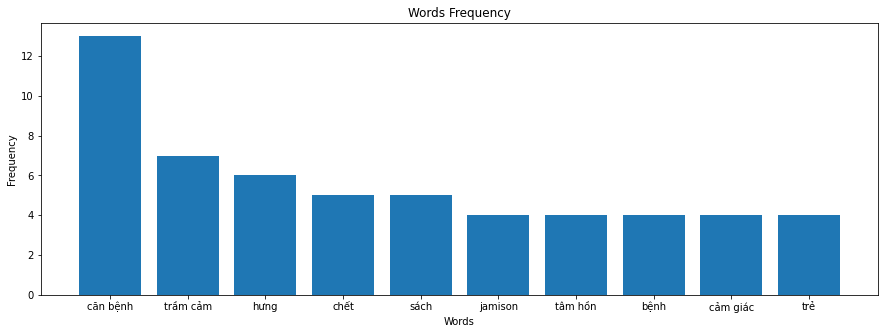

In [139]:
token_text = pre_processing(text)
tokens_arr=[j for i in token_text for j in i]
count_words = co.Counter(tokens_arr) 
total_tokens = len (tokens_arr) 
sorted_tokens = count_words.most_common (total_tokens)
print(sorted_tokens)

plt.figure(figsize=(15,5))
keys=[i[0] for i in sorted_tokens][:10]
values=[i[1] for i in sorted_tokens][:10]
plt.bar(keys,values)
plt.title('Words Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

Văn bản đề cập nhiều nhất các từ như *căn bệnh*, *hưng trầm cảm*, *tâm hồn*, *cảm giác*. Tiếp theo, chúng ta sẽ nhúng từ qua mô hình Word2Vec bằng phương pháp Skip-gram để tìm các từ gần nghĩa

In [144]:
T = len(token_text)
N = 50
model_sg = Word2Vec(min_count=1,
                     window=3,
                     size=N,
                     hs = 0,
                     sg = 1)
model_sg.build_vocab(token_text)
model_sg.train(token_text, total_examples=model_sg.corpus_count, epochs=10)

(2233, 3210)

Trong đó:
* size: Kích thước của ma trận nhúng, cũng chính là số Neuron trong lớp Hidden.
* window: Kích thước cửa sổ.
* sg: 0: phương pháp CBOW,  1: phương pháp skip-grams.
* hs: lấy negative sample
* epoch: Số lần huấn luyện

Dưới đây là các thông số đầu vào

In [145]:
V=len(model_sg.wv.vocab)
print("Số từ trong dictionary: V =",V)
print("Số câu trong văn bản: T =",T)
print("Số neuron của lớp Hidden: N =",N)

Số từ trong dictionary: V = 231
Số câu trong văn bản: T = 33
Số neuron của lớp Hidden: N = 50


Các thuật toán giảm chiều phổ biến như: Principal Components Analysis [(PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), Multidimensional Scaling [(MDS)](https://en.wikipedia.org/wiki/Multidimensional_scaling), t-distributed Stochastic Neighbor Embedding [(t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). Tiếp theo chúng ta sẽ biểu diễn các từ trong không gian 2 chiều dựa trên thuật toán giảm chiều MDS

In [146]:
def magnitude(x): 
    return math.sqrt(sum(i**2 for i in x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


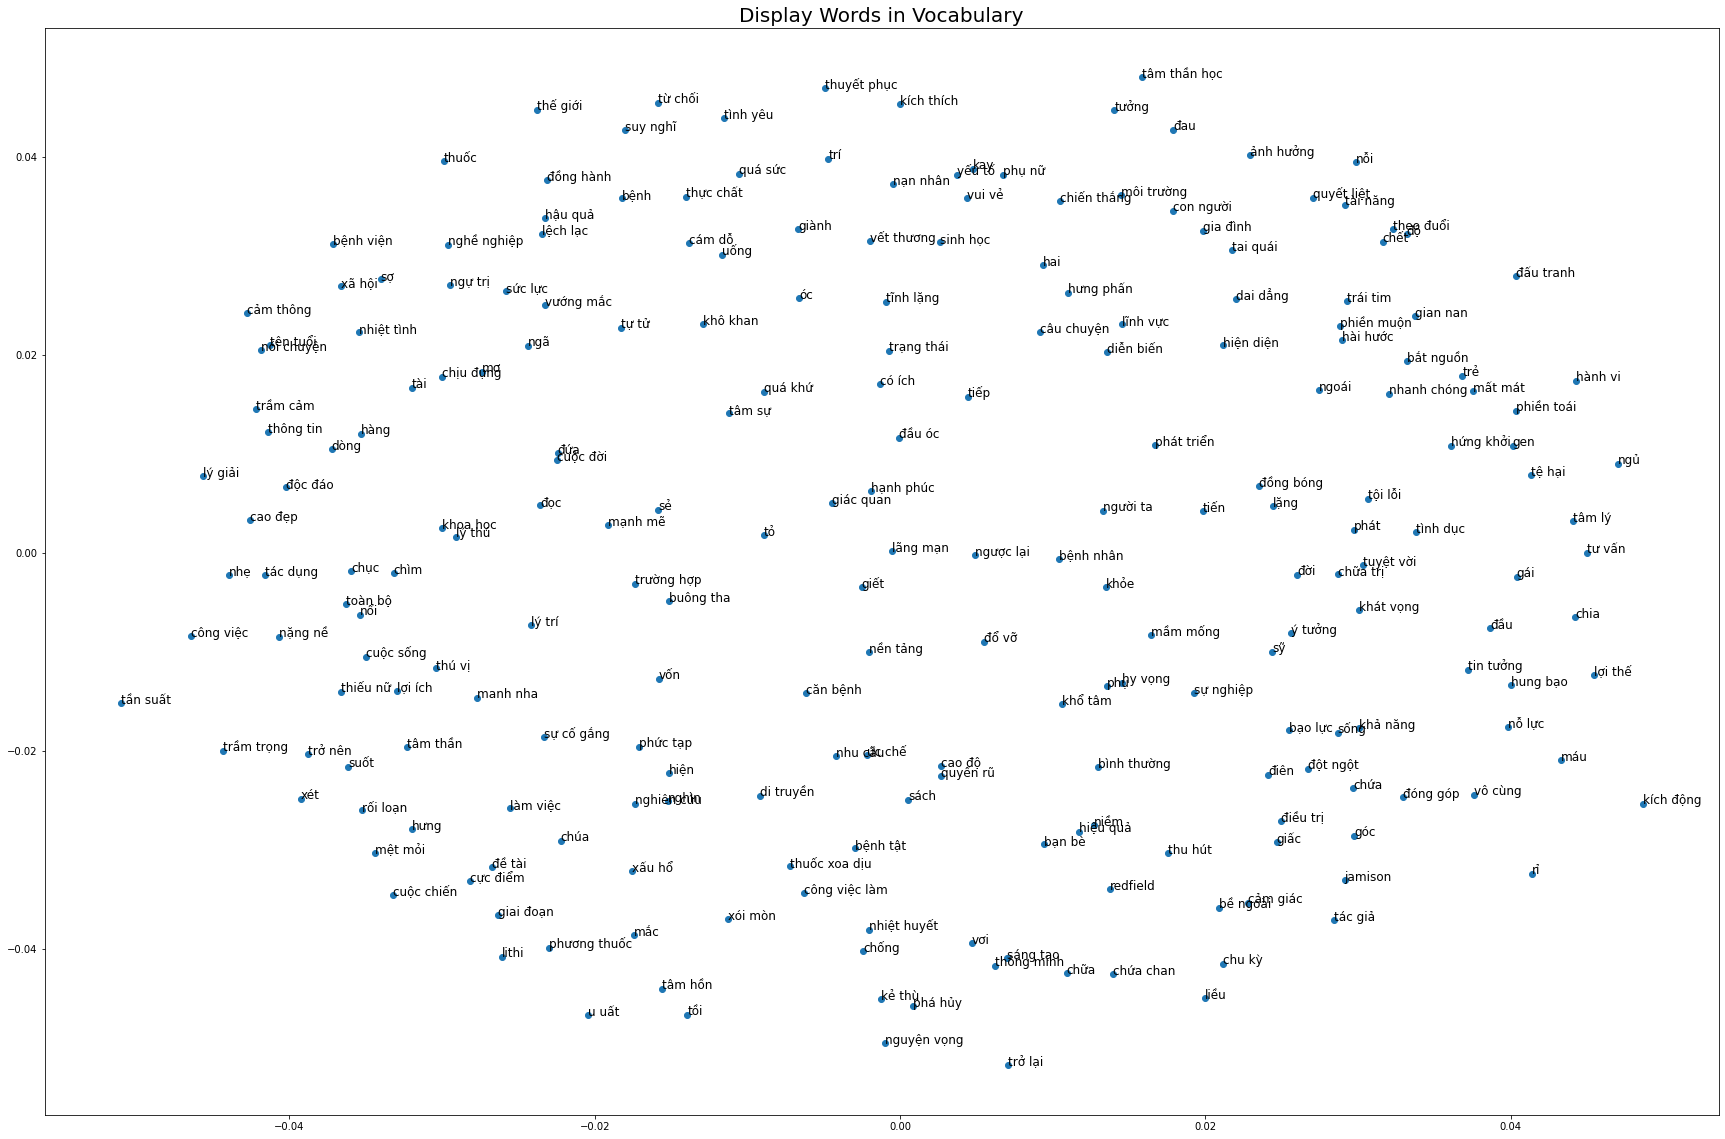

In [147]:
X = model_sg[model_sg.wv.vocab]
words = list(model_sg.wv.vocab)
arr = np.zeros((V, V))
for i in range(V):
    for j in range(V):
         arr[i][j] = arr[j][i] = magnitude(np.linalg.norm((X[i]-X[j])[:, None], axis=1).tolist())
       
mds = manifold.MDS(n_components=2, max_iter=5, random_state=0, dissimilarity="precomputed", n_jobs=1)
result = mds.fit(arr).embedding_
plt.figure(figsize=(30,20))
plt.plot(result[:, 0], result[:, 1], 'o')
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]),size=12)
plt.title('Display Words in Vocabulary',fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(11, 50)


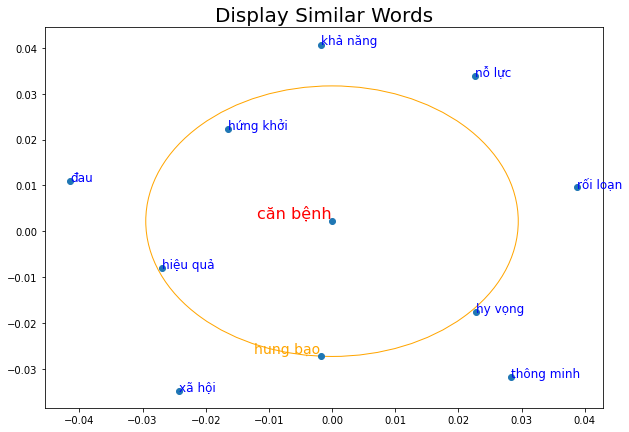

None


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hung bạo', 0.3696956932544708),
 ('hiệu quả', 0.3028261661529541),
 ('hứng khởi', 0.28600257635116577),
 ('thông minh', 0.2630012631416321),
 ('hy vọng', 0.25776320695877075),
 ('khả năng', 0.2476683408021927),
 ('xã hội', 0.23815827071666718),
 ('đau', 0.23194168508052826),
 ('nỗ lực', 0.229220449924469),
 ('rối loạn', 0.22588342428207397)]

In [150]:
def display_closestwords_tsnescatterplot(model, word):
    arr_vecto = np.empty((0,N), dtype='f')
    labels = [word]
    similar_words = model_sg.similar_by_word(word) 
    
    arr_vecto = np.append(arr_vecto, np.array([model_sg[word]]), axis=0)
    for word_score in similar_words:
        word_vector = model_sg[word_score[0]]
        labels.append(word_score[0])
        arr_vecto = np.append(arr_vecto, np.array([word_vector]), axis=0)
    print(arr_vecto.shape)
    
    dists = np.zeros((len(labels), len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            dists[i][j] = dists[j][i] = magnitude(np.linalg.norm((arr_vecto[i]-arr_vecto[j])[:, None], axis=1).tolist())
        
    mds = manifold.MDS(n_components=2, max_iter=5, random_state=0, dissimilarity="precomputed", n_jobs=1)
    Y = mds.fit(dists).embedding_

    plt.figure(figsize=(10,7))
    plt.plot(Y[:, 0], Y[:, 1], 'o')
    for i, label in enumerate(labels):
        if (i>=2):
	        plt.annotate(label, xy=(Y[i, 0], Y[i, 1]), size=12,  xytext=(0, 0), color='blue', textcoords='offset points')
     
    x0=Y[0,0]
    y0=Y[0,1]
    plt.annotate(labels[0], xy=(x0, y0), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom', color='red', fontsize=16 )
    
    x1=Y[1,0]
    y1=Y[1,1]
    plt.annotate(labels[1] , xy=(x1, y1), xytext=(0, 0), textcoords='offset points',  ha='right', va='bottom', color='orange', fontsize=14 )

    ax = plt.gca()
    
    r = math.sqrt( (x1-x0)**2 + (y1-y0)**2 )
    
    circle = plt.Circle((x0, y0), r, color='orange', fill=False)
    ax.add_artist(circle)
    plt.title('Display Similar Words', fontsize=20)
    plt.show()
print(display_closestwords_tsnescatterplot(model_sg, 'căn bệnh'))
model_sg.wv.similar_by_word('căn bệnh')

Đây là các từ cùng ngữ cảnh với *căn bệnh* được đề cập trong văn bản - bệnh hưng. Các từ tìm được mang tính biểu hiện, đặc trưng ở nhóm người, và các tâm lý liên quan với căn bệnh này. 

Có thể thấy, từ 'hung bạo' là từ giống nhất với 'căn bệnh' (trong văn bản này, chúng ta có thể hiểu là bệnh hưng) trong không gian vectơ này (có score cao nhất 0.36). Tuy nhiên, trong các kích thước MDS mới, theo quan sát có thể thấy từ 'hung bạo' không phải là gần nhất với 'căn bệnh' nhưng từ 'hứng khởi' là gần nhất. Sự khác biệt này là do MDS không bảo toàn khoảng cách. Tuy nhiên, sự khác nhau giữa score và các biểu diễn hai chiều của không gian vectơ là một điều hiển nhiên vì chúng ta không thể bảo toàn tất cả các khoảng cách từ không gian có chiều cao hơn trong không gian có chiều thấp hơn. Trong [bài viết](https://www.chrisculy.net/lx/wordvectors/wvecs_visualization.html) này cũng đề cập các  các phương pháp khác cũng gây hiện tượng như trên.


Tương tự như phương pháp Skip-gram, phương pháp CBOW với thông số cài đặt sg = 0 cho mô hình Wor2Vec, để dự đoán các từ trung tâm thông qua các từ ngữ cảnh. 

In [45]:
model_cb = Word2Vec(min_count=1,
                     window=2,
                     size=N,
                     sg = 0)
model_cb.build_vocab(token_text)
model_cb.train(token_text, total_examples=model_cb.corpus_count, epochs=5)

(1160, 1630)

Tiếp theo, chúng ta sẽ dự đoán từ gì xuất hiện trong ngữ cảnh *sức khỏe*, *bệnh tật*, *vết thương* của văn bản review trên.

In [47]:
model_cb.predict_output_word(['sức khỏe','bệnh tật','vết thương'])[0]

('suy nghĩ', 0.0042373403)

TÀI LIỆU THAM KHẢO

https://arxiv.org/pdf/1411.2738.pdf

https://www.chrisculy.net/lx/wordvectors/wvecs_visualization.html

http://jalammar.github.io/illustrated-word2vec/

